In [5]:
import numpy as np
import pandas
import matplotlib.pyplot as plt

# Datasets
from sklearn.datasets import load_iris, load_digits, load_breast_cancer

# Training and testing sets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Classifiers
from sklearn.neural_network import MLPClassifier

# Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score, precision_score, f1_score

# Datasets
## Breast cancer

In [10]:
data = load_breast_cancer()
print('Features', data.feature_names)
print('Target', data.target_names)
print('Data Shape', data.data.shape)

Features ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Target ['malignant' 'benign']
Data Shape (569, 30)


In [13]:
x, y = load_breast_cancer(return_X_y = True)
print('X', x.shape)
print('Y', len(y), np.unique(y, return_counts = True))

X (569, 30)
Y 569 (array([0, 1]), array([212, 357], dtype=int64))


## Iris

In [16]:
data = load_iris()
print('Features', data.feature_names)
print('Target', data.target_names)
print('Data Shape', data.data.shape)

Features ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target ['setosa' 'versicolor' 'virginica']
Data Shape (150, 4)


In [18]:
x, y = load_iris(return_X_y = True)
print('X', x.shape)
print('Y', len(y), np.unique(y, return_counts = True))

X (150, 4)
Y 150 (array([0, 1, 2]), array([50, 50, 50], dtype=int64))


## Digits

In [20]:
data = load_digits()
print('Target', data.target_names)
print('Data Shape', data.data.shape)

Target [0 1 2 3 4 5 6 7 8 9]
Data Shape (1797, 64)


In [22]:
x, y = load_digits(return_X_y = True)
print('X', x.shape)
print('Y', len(y), np.unique(y, return_counts = True))

X (1797, 64)
Y 1797 (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([178, 182, 177, 183, 181, 182, 181, 179, 174, 180], dtype=int64))


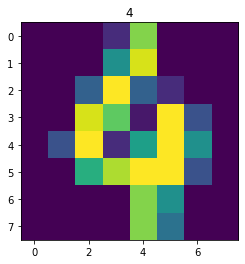

In [26]:
#i = 10
i = 100
plt.figure()
plt.title(y[i])
plt.imshow(np.reshape(x[i, :], (8, 8)))
plt.show()

# Training and testing sets

In [74]:
x, y = load_iris(return_X_y = True)
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.1, random_state = 0) #Random-state is the seed
print('X:', x.shape, 'Y:', len(y))
print('xTrain:', xTrain.shape, 'yTrain:', len(yTrain))
print('xTest:', xTest.shape, 'yTest:', len(yTest))
print('yTest:', yTest)

X: (150, 4) Y: 150
xTrain: (135, 4) yTrain: 135
xTest: (15, 4) yTest: 15
yTest: [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1]


### Cross Validation

In [98]:
x, y = load_iris(return_X_y = True)
kf = KFold(n_splits = 10, random_state = 0, shuffle = True)
for trainI, testI in kf.split(x):
    #print(testI)
    xTrain, yTrain = x[trainI, :], y[trainI]
    xTest, yTest = x[testI, :], y[testI]
    print('X:', x.shape, 'Y:', len(y))
    print('xTrain:', xTrain.shape, 'yTrain:', len(yTrain))
    print('xTest:', xTest.shape, 'yTest:', len(yTest))
    #print('yTest:', yTest)
    print()

X: (150, 4) Y: 150
xTrain: (135, 4) yTrain: 135
xTest: (15, 4) yTest: 15

X: (150, 4) Y: 150
xTrain: (135, 4) yTrain: 135
xTest: (15, 4) yTest: 15

X: (150, 4) Y: 150
xTrain: (135, 4) yTrain: 135
xTest: (15, 4) yTest: 15

X: (150, 4) Y: 150
xTrain: (135, 4) yTrain: 135
xTest: (15, 4) yTest: 15

X: (150, 4) Y: 150
xTrain: (135, 4) yTrain: 135
xTest: (15, 4) yTest: 15

X: (150, 4) Y: 150
xTrain: (135, 4) yTrain: 135
xTest: (15, 4) yTest: 15

X: (150, 4) Y: 150
xTrain: (135, 4) yTrain: 135
xTest: (15, 4) yTest: 15

X: (150, 4) Y: 150
xTrain: (135, 4) yTrain: 135
xTest: (15, 4) yTest: 15

X: (150, 4) Y: 150
xTrain: (135, 4) yTrain: 135
xTest: (15, 4) yTest: 15

X: (150, 4) Y: 150
xTrain: (135, 4) yTrain: 135
xTest: (15, 4) yTest: 15



In [100]:
x, y = load_breast_cancer(return_X_y = True)

kf = KFold(n_splits = 10, random_state = 0, shuffle = True)

results = []
for trainI, testI in kf.split(x):
    #print(testI)
    xTrain, yTrain = x[trainI, :], y[trainI]
    xTest, yTest = x[testI, :], y[testI]
    model = MLPClassifier(random_state = 0)
    model.fit(xTrain, yTrain)
    yPred = model.predict(xTest)
    
    results.append(f1_score(yTest, yPred, average = 'macro'))

print('Macro F1:', results)

Macro F1: [0.9439895185063871, 0.9463108320251178, 0.9565548780487805, 1.0, 0.8782051282051282, 0.8635897435897436, 0.9439895185063871, 0.9246031746031745, 0.97999297999298, 0.9083469721767594]


C:\Users\lalor\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


## Metrics

In [95]:
x, y = load_iris(return_X_y = True)
data = load_iris()

xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.3, random_state = 0)\

model = MLPClassifier(random_state = 0)
model.fit(xTrain, yTrain)
yPred = model.predict(xTest)

print('Accuracy:', accuracy_score(yTest, yPred))
print('Confusion Matrix:\n', confusion_matrix(yTest, yPred))

m = confusion_matrix(yTest, yPred)
m = m.transpose()
m = np.round(100 * m / np.sum(m, axis = 0), 0).transpose()
df = pandas.DataFrame(m, index = data.target_names, columns = data.target_names)
df

Accuracy: 0.9777777777777777
Confusion Matrix:
 [[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]


C:\Users\lalor\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


,setosa,versicolor,virginica
setosa,100.0,0.0,0.0
versicolor,0.0,94.0,6.0
virginica,0.0,0.0,100.0


## Precision, recall, F1

In [96]:
x, y = load_breast_cancer(return_X_y = True)
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.3, random_state = 0)

model = MLPClassifier(random_state = 0)
model.fit(xTrain, yTrain)
yPred = model.predict(xTest)

print('Accuracy:', accuracy_score(yTest, yPred))
print('Recall:', recall_score(yTest, yPred))
print('Precision:', precision_score(yTest, yPred))
print('F1:', f1_score(yTest, yPred))
print('Macro-F1:', f1_score(yTest, yPred, average = 'macro'))

Accuracy: 0.9649122807017544
Recall: 0.9814814814814815
Precision: 0.9636363636363636
F1: 0.9724770642201834
Macro-F1: 0.962044983722995
